<img src="Auswahl_2015-12-10_001.png"/>

<pre style="text-align: right">
Gruppe:             
                MeSi
Autoren:            
Jens Meiners
Arne Siebenmorgen
</pre>

<img src="Auswahl_2015-12-10_002.png"/>

$C_{p,N}+C_{p,N-1} = 2\sum^{N-1}_{k=0}\binom{p-1}{k} + 2\sum^{N-2}_{k=0}\binom{p-1}{k} = 2 \lbrack \sum^{N-1}_{k=0}\binom{p-1}{k} + \sum^{N-1}_{k=0}\binom{p-1}{k} \rbrack$

This leads to pairs of $\binom{p-1}{k}+\binom{p-1}{k-1}$ wich are equal to $\binom{p}{k}$. The fist pair of the sum however is $\binom{p-1}{0}+\binom{p-1}{-1}$, $\binom{n}{-1}$ is not defined since there are no factorial of negative numbers. Therefore $\binom{p-1}{0}+\binom{p-1}{-1} = \binom{p-1}{0} = 1 = \binom{p}{0}$. 

For this reason $2 \lbrack \sum^{N-1}_{k=0}\binom{p-1}{k} + \sum^{N-1}_{k=0}\binom{p-1}{k} \rbrack = 2 \sum^{N-1}_{k=0}\binom{p}{k} = C_{p+1,N}$

<img src="Auswahl_2015-12-10_003.png"/>

In [48]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from matplotlib.pyplot import subplots
from sklearn.utils import array2d
from sklearn.linear_model import Perceptron
%matplotlib inline

cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'blue': [(0, 0.7, 0.7), (1, 1, 1)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'red': [(0, 1, 1), (1, 0.7, 0.7)]})

Generate some random data for argumentation

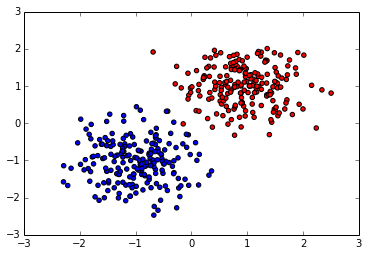

In [90]:
cov1 = [[0.3, 0], 
       [0, 0.3]]
cov2 = [[0.3, 0], 
       [0, 0.3]]

mean1 = [1. , 1.]
mean2 = [-1. , -1.]

X1,y1 = np.random.multivariate_normal(mean1, cov1, 200).T
X2,y2 = np.random.multivariate_normal(mean2, cov2, 200).T

X = np.vstack((np.hstack((X1,X2)),np.hstack((y1,y2)))).T
Y = np.ones(X.shape[0])
Y[:X.shape[0]/2] *= -1

plt.scatter(X1, y1, c='red')
plt.scatter(X2, y2, c='blue')
plt.show()

define a plotting function to run for different settings. The model that needs to be parameterized is a function that takes one variable of shape (n_samples, n_features) and returns a class probability between zero and one.

In [91]:
def plot_(model, w=None,b=None):
    """
    with model(X):
    X : array-like, shape (n_samples, n_features)
    """
    h = .02  # step size in the mesh


    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    fig, ax = subplots()
    if w is not None:
        Z = model(np.c_[xx.ravel(), yy.ravel()],w,b)
    else:
        Z = model(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=.7)

    # Plot also the training points
    plt.scatter(X1, y1, c='red')
    plt.scatter(X2, y2, c='blue')
    
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    plt.show()

define the function to use for plotting

generate some examples!<br>
strat with a simple trained perceptron

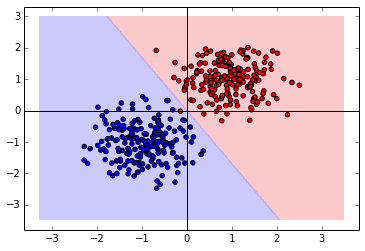

In [92]:
clf = Perceptron(n_iter=100).fit(X, Y)
plot_(clf.predict)

now, experiment with hand made decision boundries

In [95]:
def decision_function(X,w,b):
    X = array2d(X)
    return np.sign(np.dot(X, w.T) + b)

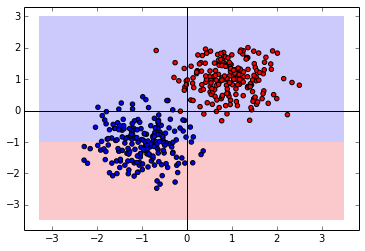

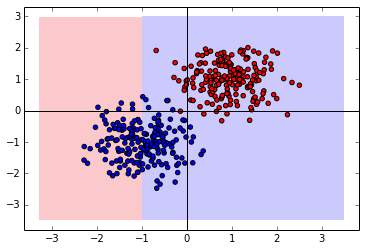

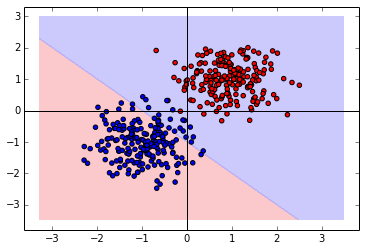

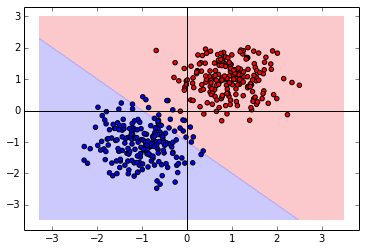

In [96]:
w = np.array([[0,1]])
b = np.array([1])
plot_(decision_function, w, b)

w = np.array([[1,0]])
b = np.array([1])
plot_(decision_function, w, b)

w = np.array([[1,1]])
b = np.array([1])
plot_(decision_function, w, b)

w = np.array([[-1,-1]])
b = np.array([-1])
plot_(decision_function, w, b)

The first thing we notice, is that the weight vector $w$ defines the skew of the decision boundry. In this example, the blue class has the label 1 while the red class has the lable -1. For the first plot, the vector 
$\left(\begin{smallmatrix}0 \\ 1\end{smallmatrix}\right)$
points streight upwards, defining the direction of where to find the positive class. But this information is not sufficient. The bias $b$ defines an "offset" of the descision boundry. Looking at the first plot again, a positive bias of 1 moves the boundry down by 1. It therefor defines a horizontal line $f(x) = -1$. That the boundry is moved down with positive $b$ seems counterintuitive, but makes sense if one takes a closer look at the decision_function where every point $w^\top X$ is shifted by $+b$. If $b$ is positive, every decision point is moved up, but since we only see the boundry plottet with respect to the original points, it seems to be the other way round. This is in fact the same as with parabola where $(x + 1)^2$ is actually shifted to the left. So within the function, the points are actually shifted into positive direction, but relative to the actual outcome, it is the other way around.

The following plots underline the statements. Plot 2 holds a weight vector that points to the right with the same bias. In plot 3, $w$ points to the upper right corner of the plot and we can see the boundry intersecting the axis at $x,y = -1$. the last plot switches both classes by multiplying $w$ and $b$ with $-1$

<img src="Auswahl_2015-12-10_004.png"/>

The VC-dimension denotes a number that can be associated with any separation task. For linear separability, like the peceptron implements, this number happens to be $3$ for two dimensional datapoints with two classes. This is because of the following:

imagine three datapoints, being scattered randomly in zwi dimensional space.

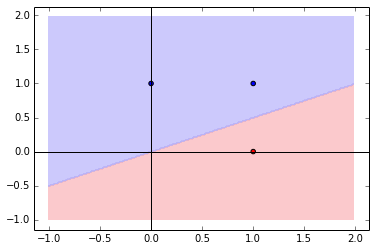

In [102]:
X1,y1 = [1],[0]
X2,y2 = [0,1],[1,1]

X = np.vstack((np.hstack((X1,X2)),np.hstack((y1,y2)))).T
Y = np.ones(X.shape[0])
Y[:X.shape[0]/2] *= -1

clf = Perceptron(n_iter=100).fit(X, Y)
plot_(clf.predict)

It is always possible to draw a line that seperates the two classes. But what about 4 points ?

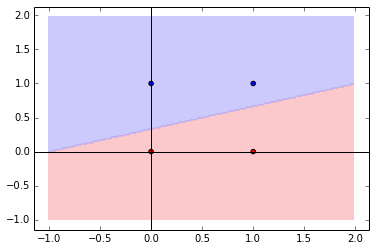

In [103]:
X1,y1 = [1,0],[0,0]
X2,y2 = [0,1],[1,1]

X = np.vstack((np.hstack((X1,X2)),np.hstack((y1,y2)))).T
Y = np.ones(X.shape[0])
Y[:X.shape[0]/2] *= -1

clf = Perceptron(n_iter=100).fit(X, Y)
plot_(clf.predict)

Here it is possible, but there are other cases:

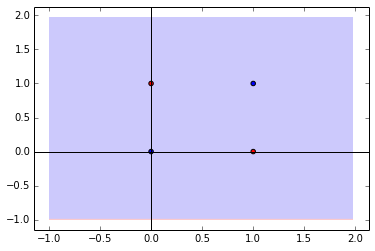

In [104]:
X1,y1 = [1,0],[0,1]
X2,y2 = [0,1],[0,1]

X = np.vstack((np.hstack((X1,X2)),np.hstack((y1,y2)))).T
Y = np.ones(X.shape[0])
Y[:X.shape[0]/2] *= -1

clf = Perceptron(n_iter=100).fit(X, Y)
plot_(clf.predict)

Because this specific 4 points are not linearly seperable, but 3 are for every orientation, the VC-dimension for this specivic perceptron is 3. It is the maximum number of points that can be scattert such that the perceptron can shatters them.

More formally, the VC-dimension for any class $C$ is defined as <br>
$VC(C)=\underset{n}{\min}\{n:S_C(n)<2^n\}\,$ with $S_C$ being the <i>shattering coefficient</i><br>
This Coefficient is the maximum cardinality of a set of $n$ points that can be shattered with the sets from class $C$. Note tht the three datapoints plot is only one example of the $2^3$ possible arrangements of points for this specific example. Also $S_C(n)=2^n$ means, that the $n$ datapoints can be shattered by the class (here perceptron). If the coefficient is smaller, than this is not the case. Furthermore, the coefficient states that for the latter case, this also holds true for any higher cardinality of points.

To conclude, both values give insight on the possibility of the set of points being shattered by a collection $C$ of sets that can be interpreted as a model producing a limited set of decision boundries.

<img src="Auswahl_2015-12-10_005.png"/>

The margin is the space between the decision boundary and the closest samples from both classes. The size of the margin is defined as the minimum distance between the decision boundary and all sample points. 
A small margin leads to poor generalization since the space to classify new samples to one side of the boundary is rather small.
A big margin however leads to better generalization because samples of a certain class, that are a little off, are more likely to be classified to the right group.

<img src="Auswahl_2015-12-10_006.png"/>

From
$$\min_{\alpha=1,...,p}|w^\top x^{(\alpha)}+b| = 1$$
If follows, that
$$|w^\top x^{(\alpha)}+b| \geq 1.\;\;\;\;\;\;\;(1)$$
Given
$$d(x^{(\alpha)},w,b) = \frac{|w^\top x^{(\alpha)}+b|}{\|w\|} = $$
which is the distance of point $x^{(\alpha)}$ to the hyperplane $(w,b)$. <br>
It follows
$$|w^\top x^{(\alpha)}+b| = d(x^{(\alpha)},w,b) \|w\|$$
and with (1)
$$d(x^{(\alpha)},w,b) \|w\| \geq 1$$
which is what should be proofed.


<img src="Auswahl_2015-12-10_007.png"/>

The the primal optimization problem is to find a hyperplane, separating the samples into the given classes, with maximum margin for the given sample. The idea behind this optimization is to find the hyperplane with the best generalization. As discussed in a), a larger margin leads to better generalization.

<img src="Auswahl_2015-12-10_008.png"/>

The Kuhn Tucker theorem is a generalization of the Lagrange Multiplier, a technique to find the extrema of multivariate functions with constraints. It solves the primal problem by solving the dual nonlinear programming problem.
For the dual problem only the samples on the edge of the margins are used, they are called support vectors. These support vectors are most likely little in number. Therefore the dual variable is sparse.

<img src="Auswahl_2015-12-10_009.png"/>

$$\frac{\delta L}{\delta b} = 0 \;\;\;\;\Rightarrow\;\;\;\; \sum_{\alpha = 1}^{p} \lambda_\alpha y_{t}^{(\alpha)} = 0\;\;\;\;(1)$$

$$\frac{\delta L}{\delta w} = 0 \;\;\;\;\Rightarrow\;\;\;\; w = \sum_{\alpha = 1}^{p} \lambda_\alpha y_{t}^{(\alpha)} x^{(\alpha)} \;\;\;\;(2)$$
Also we know that $f(x) = w^\top x+b\;\;(3)$.<br>
We now substitute $(2) \to (3)$
$$f(x) = (\sum_{\alpha = 1}^{p} \lambda_\alpha y_{t}^{(\alpha)} x^{(\alpha)})^\top x + b$$
$$= \sum_{\alpha = 1}^{p} \lambda_\alpha y_{t}^{(\alpha)} ((x^{(\alpha)})^\top x) + b$$
It is also known that $w$ in the cost function $\min_{w}\|w\|^2$ subject to $y_t(w^\top x_t + b) \geq 1$<br>
$$\|w\|^2 = (\sum_{\alpha = 1}^{p} \lambda_\alpha y_{t}^{(\alpha)} x^{(\alpha)})^\top (\sum_{\beta = 1}^{p} \lambda_\beta y_{t}^{(\beta)} x^{(\beta)}) = \sum_{\alpha,\beta=1}^p \lambda_\alpha \lambda_\beta y_{t}^{(\alpha)} y_{t}^{(\beta)} ((x^{(\alpha)})^\top x^{\beta})\;\;\;\;(4)$$
Hence we need to 
$$\min_{\lambda_{\alpha}}\sum_{\alpha,\beta=1}^p \lambda_\alpha \lambda_\beta y_{t}^{(\alpha)} y_{t}^{(\beta)} ((x^{(\alpha)})^\top x^{\beta}) \;\;\;\;\text{subject to}\;\;\;\; y^{(\alpha)} (\sum_{\alpha = 1}^p \lambda_\alpha y_{t}^{(\alpha)} ((x^{(\alpha)})^\top x) + b) \geq 1$$
For the final step, we put our results $(4),(1)$ into the Langrangian stated in de beginning of 8.4.

$$\frac{1}{2}  \sum_{\alpha,\beta=1}^p \lambda_\alpha \lambda_\beta y_{t}^{(\alpha)} y_{t}^{(\beta)} ((x^{(\alpha)})^\top x^{\beta}) - \sum_{\alpha = 1}^{p} \lambda_\alpha y_{t}^{(\alpha)} \sum_{\beta = 1}^{p} \lambda_\beta y_{t}^{(\beta)}((x^{(\alpha)})^\top x^{(\beta)}) - (\sum_{\alpha = 1}^{p} \lambda_\alpha y_{t}^{(\alpha)})b + \sum_{\alpha = 1}^{p} \lambda_\alpha$$

Using $(1)$
$$\frac{1}{2}  \sum_{\alpha,\beta=1}^p \lambda_\alpha \lambda_\beta y_{t}^{(\alpha)} y_{t}^{(\beta)} ((x^{(\alpha)})^\top x^{\beta}) - \sum_{\alpha,\beta=1}^p \lambda_\alpha \lambda_\beta y_{t}^{(\alpha)} y_{t}^{(\beta)} ((x^{(\alpha)})^\top x^{\beta}) + \sum_{\alpha = 1}^{p} \lambda_\alpha$$
$$= -\frac{1}{2}  \sum_{\alpha,\beta=1}^p \lambda_\alpha \lambda_\beta y_{t}^{(\alpha)} y_{t}^{(\beta)} ((x^{(\alpha)})^\top x^{\beta}) + \sum_{\alpha = 1}^{p} \lambda_\alpha$$
Which is the result we where looking for

Hence, the solution to the dual is given by
$$
\lambda = arg\max_\lambda \frac{1}{2}  \sum_{\alpha,\beta=1}^p \lambda_\alpha \lambda_\beta y_{t}^{(\alpha)} y_{t}^{(\beta)} ((x^{(\alpha)})^\top x^{\beta}) - \sum_{\alpha = 1}^{p} \lambda_\alpha\;\;\;\;(5)
$$
In addition to $(1)$, there is another constraint: $\lambda_\alpha \geq 0,\forall \alpha = 1,...,p$<br>
With this constraints $(5)$ can be solved and determines the Lagrange multipliers.
Also, the optimal seperating Hyperplane is defined by 
$$w = \sum_{\alpha,\beta=1}^p \lambda_\alpha x^{(\alpha)} y^{(\alpha)}$$
$$b = - \frac{1}{2}w \cdot [x_0 + x_1]$$
where $x_0,x_1$ are any support vectors from different classes. The classifier can be defined as
$f(x) = sign(wx+b)$

<img src="Auswahl_2015-12-10_010.png"/>

$K_{\alpha,\beta} = K(x^{(\alpha)}, x^{(\beta)}) = \phi(x^{(\alpha)})^T\phi(x^{(\beta)}) = \phi(x^{(\beta)})^T\phi(x^{(\alpha)}) = K(x^{(\beta)}, x^{(\alpha)}) = K_{\beta,\alpha}$

<img src="Auswahl_2015-12-10_013.png"/>

From the Lecture, we know Mercers theorem which states that a valid Kernel has an interesting link to an Eigenvalue-Decomposition. 

<img src="Auswahl_2015-12-16_001.png" />

Therefore we know, that a valid Kernel has only values $\geq 0$. <br>
Because of 
$$a^\top a \geq 0 \;\;\;\;\Rightarrow\;\;\;\;a^\top Ka \geq 0$$

<img src="Auswahl_2015-12-10_012.png"/>

Since $K_1$ and $K_2$ are positive semidefinite, adding them up preserves this property.
$$K_1 \geq 0, K_2 \geq 0 \Rightarrow K_3 = K_1 + K_2 \geq 0 $$
Also, since both are symmetric
$$K_3(x,y) = K_1(x,y)+ K_2(x,y) = K_1(y,x) + K_2(y,x) = K_3(y,x)$$